# Baseline Experiments & Results

## 1. Imports & Setup

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

RANDOM_SEED = 42

## 2. Load Cleaned Diabetes Dataset

In [11]:
df = pd.read_csv('../data/diabetes_raw_data.csv') 

print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (1879, 45)


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,0,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0


## 3. Prepare Features and Target Variable

In [12]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

print("Features:", list(X.columns))

Features: ['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryDiabetes', 'GestationalDiabetes', 'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications', 'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss', 'FatigueLevels', 'BlurredVision', 'SlowHealingSores', 'TinglingHandsFeet', 'QualityOfLifeScore', 'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality', 'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy']


## 4. Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    shuffle=True,
    random_state=RANDOM_SEED
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 1503
Testing samples: 376


## 5. Scale Features

In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. Baseline Classification with All Features

In [15]:
clf = DecisionTreeClassifier(random_state=RANDOM_SEED)

clf.fit(X_train_scaled, y_train)

print("Baseline Model Trained.")

Baseline Model Trained.


## 7. Evaluate Baseline Model

In [16]:
y_pred = clf.predict(X_test_scaled)

baseline_accuracy = accuracy_score(y_test, y_pred)

print(f"--- BASELINE RESULTS ---")
print(f"Accuracy: {baseline_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

--- BASELINE RESULTS ---
Accuracy: 0.9202

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       226
           1       0.91      0.89      0.90       150

    accuracy                           0.92       376
   macro avg       0.92      0.92      0.92       376
weighted avg       0.92      0.92      0.92       376



## 8. plot Feature Importance

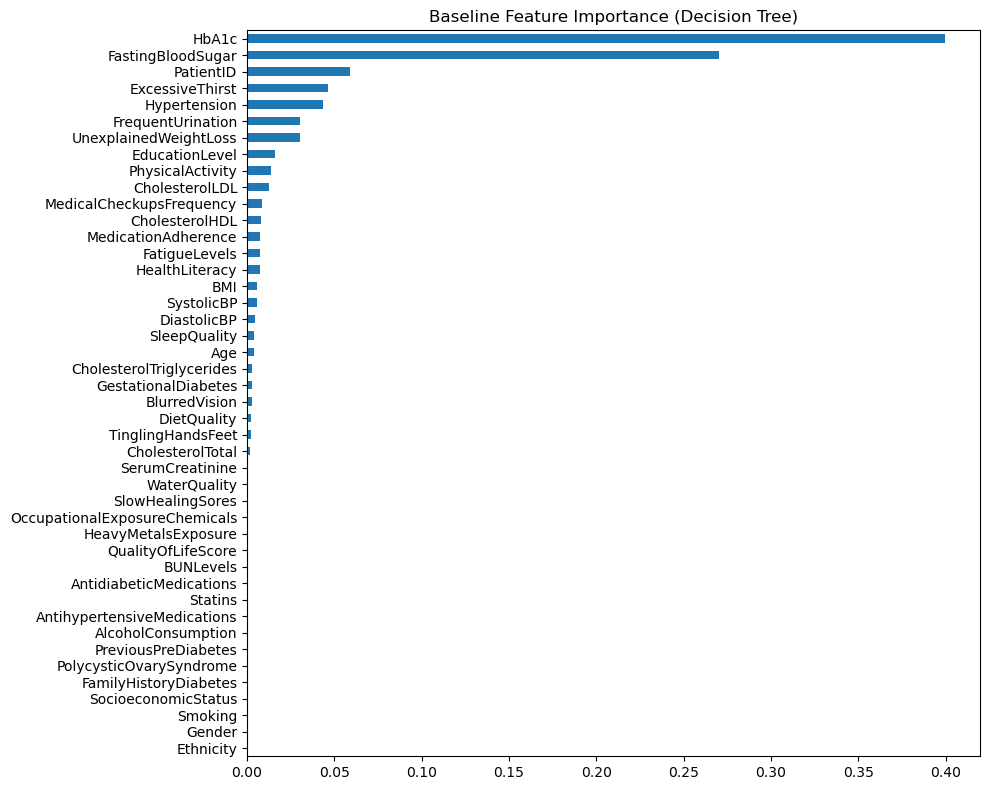

In [17]:
plt.figure(figsize=(10, 8))
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Baseline Feature Importance (Decision Tree)')
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12864\3592623886.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=correlations_sorted.index, x=correlations_sorted.values, palette='coolwarm')


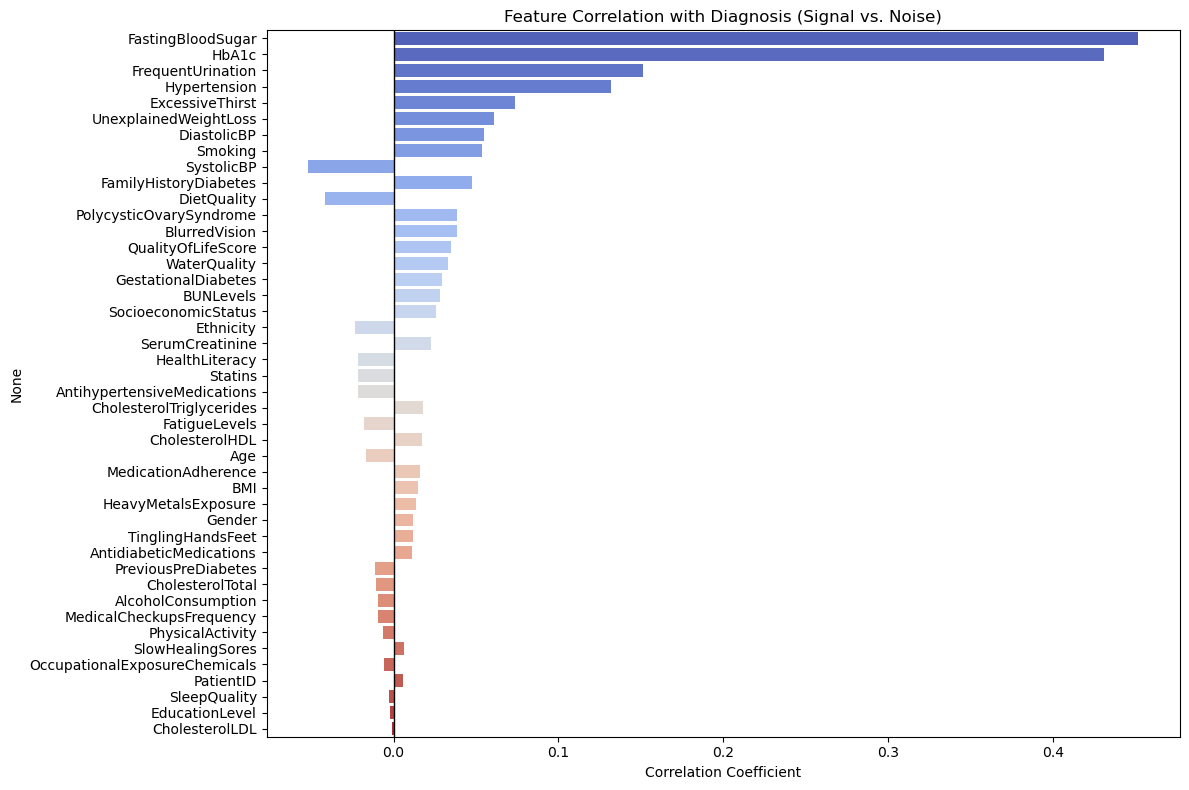

In [18]:
correlations = df.corr()['Diagnosis'].drop('Diagnosis')

# Sort values to see high signal vs. noise
correlations_sorted = correlations.sort_values(key=abs, ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(y=correlations_sorted.index, x=correlations_sorted.values, palette='coolwarm')
plt.title('Feature Correlation with Diagnosis (Signal vs. Noise)')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12864\3812420023.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Diagnosis', y=top_feature, ax=axes[0], palette='Set2')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12864\3812420023.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Diagnosis', y=noise_feature, ax=axes[1], palette='Set2')


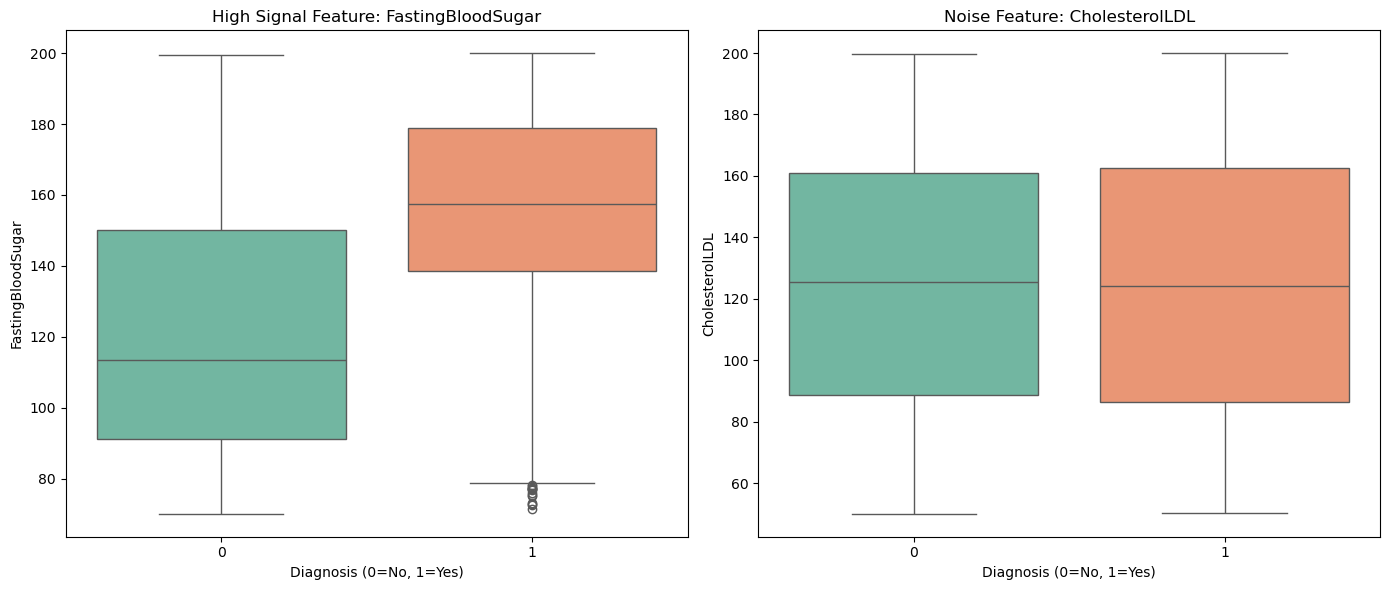

In [19]:
# Select the top correlated feature and the lowest correlated feature automatically
top_feature = correlations.abs().idxmax()
noise_feature = correlations.abs().idxmin()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Signal Feature
sns.boxplot(data=df, x='Diagnosis', y=top_feature, ax=axes[0], palette='Set2')
axes[0].set_title(f'High Signal Feature: {top_feature}')
axes[0].set_xlabel('Diagnosis (0=No, 1=Yes)')

# Plot Noise Feature
sns.boxplot(data=df, x='Diagnosis', y=noise_feature, ax=axes[1], palette='Set2')
axes[1].set_title(f'Noise Feature: {noise_feature}')
axes[1].set_xlabel('Diagnosis (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

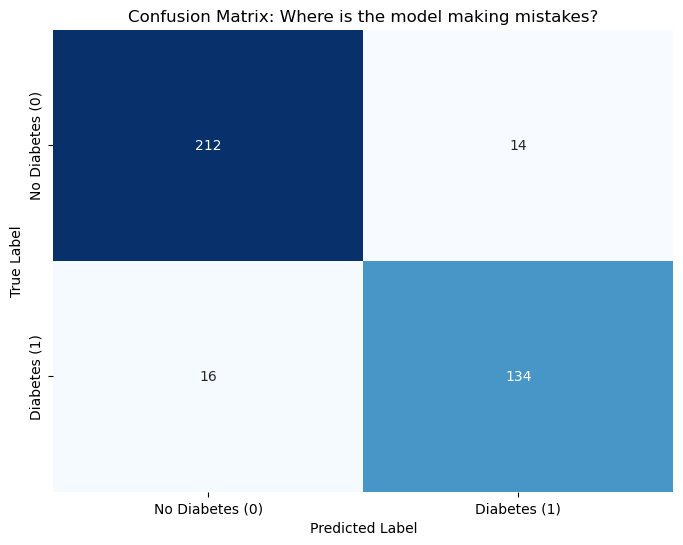

In [21]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes (0)', 'Diabetes (1)'],
            yticklabels=['No Diabetes (0)', 'Diabetes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Where is the model making mistakes?')
plt.show()

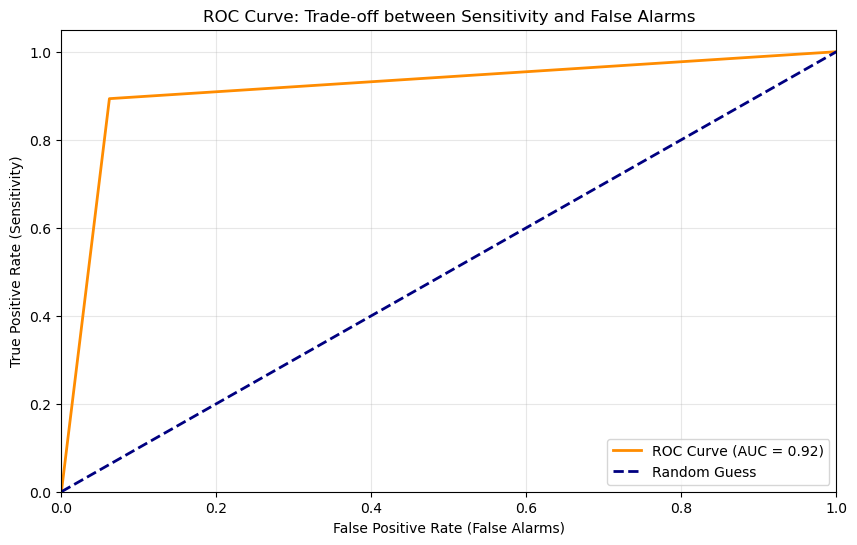

In [22]:
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities for the positive class (Diabetes)
y_probs = clf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (False Alarms)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve: Trade-off between Sensitivity and False Alarms')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

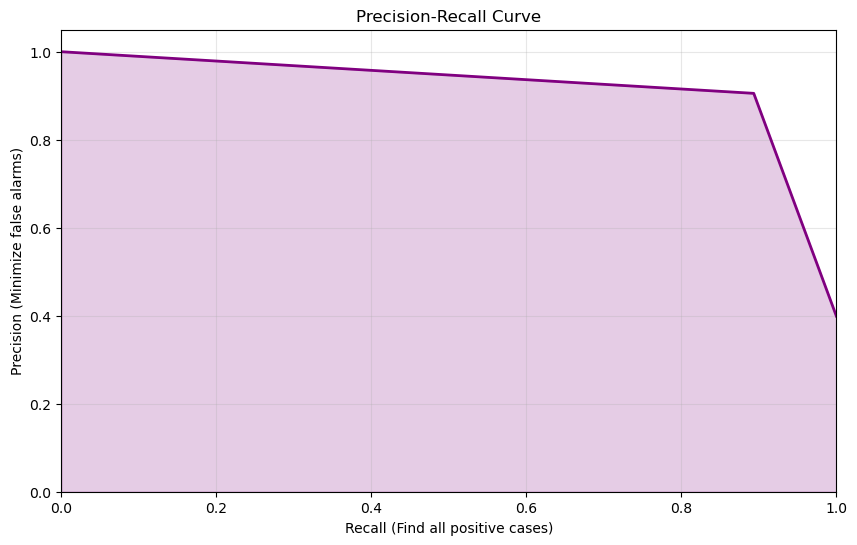

In [23]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision-Recall curve metrics
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='purple', lw=2)
plt.fill_between(recall, precision, alpha=0.2, color='purple')

plt.xlabel('Recall (Find all positive cases)')
plt.ylabel('Precision (Minimize false alarms)')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True, alpha=0.3)
plt.show()